<a href="https://colab.research.google.com/github/haruhiysd/QM-Group-Project/blob/main/Scatter_Plots_Waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving merged_df_3(in).csv to merged_df_3(in).csv


In [ ]:
import pandas as pd
df = pd.read_csv('merged_df_3(in).csv')
df.head()

,Autonomous_community,Period,Monthly_number_of_tourists,GDP_per_capita,Unemployment_rate,HPI,total_waste_capita,Total_mixed_waste,Total_waste_no_CDW_and_other,Yearly_tourist_numbers
0,01 Andalucía,1/1/2007,NaN,NaN,NaN,127.081,NaN,NaN,NaN,NaN
1,02 Aragón,1/1/2007,NaN,NaN,NaN,175.582,NaN,NaN,NaN,NaN
2,"03 Asturias, Principado de",1/1/2007,NaN,NaN,NaN,138.726,NaN,NaN,NaN,NaN
3,"04 Balears, Illes",1/1/2007,NaN,NaN,NaN,134.284,NaN,NaN,NaN,NaN
4,05 Canarias,1/1/2007,NaN,NaN,NaN,132.560,NaN,NaN,NaN,NaN


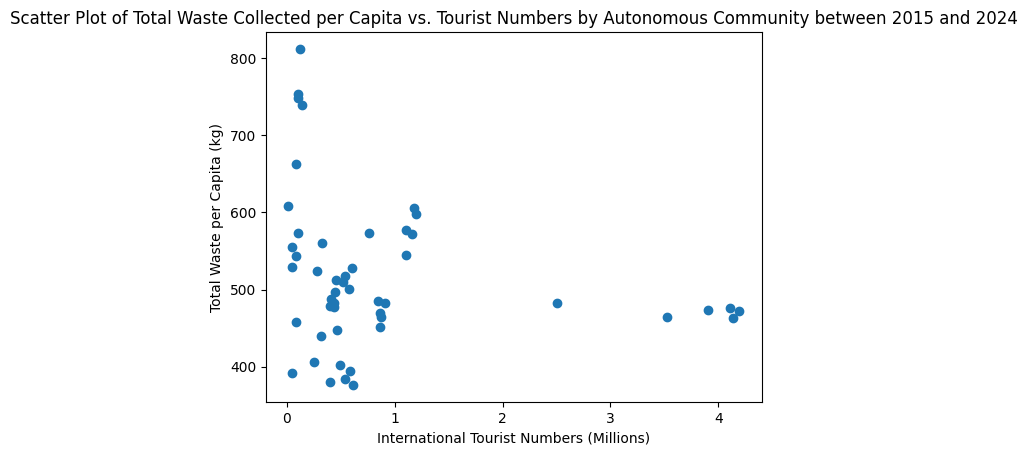

In [ ]:
df['Period'] = pd.to_datetime(df['Period'])
df['Monthly_number_of_tourists_millions'] = df['Monthly_number_of_tourists'] / 1000000
df['Total_mixed_waste(millions)'] = df['Total_mixed_waste'] / 1000000
df = df[df['Period'] >= '2015-01-01'].reset_index(drop=True)
df_quarterly = df[df['Period'].dt.month.isin([1, 4, 7, 10])]
import matplotlib.pyplot as plt

plt.scatter(df_quarterly['Monthly_number_of_tourists_millions'], df_quarterly['total_waste_capita'])

plt.xlabel('International Tourist Numbers (Millions)')
plt.ylabel('Total Waste per Capita (kg)')
plt.title('Scatter Plot of Total Waste Collected per Capita vs. Tourist Numbers by Autonomous Community between 2015 and 2024')

plt.show()

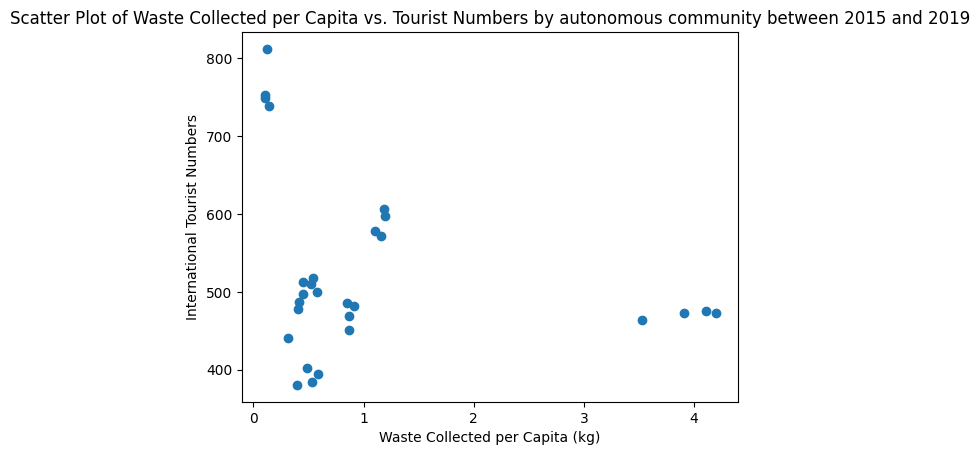

In [ ]:
#taking out covid outliers
df_quarterly_no_covid = df_quarterly[df_quarterly['Period'].dt.year <= 2019]

plt.scatter(df_quarterly_no_covid['Monthly_number_of_tourists_millions'], df_quarterly_no_covid['total_waste_capita'])

plt.xlabel('Waste Collected per Capita (kg)')
plt.ylabel('International Tourist Numbers')
plt.title('Scatter Plot of Waste Collected per Capita vs. Tourist Numbers by autonomous community between 2015 and 2019')

plt.show()

<ipython-input-10-eec03edc63d5>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_communities))  # Choose a colormap


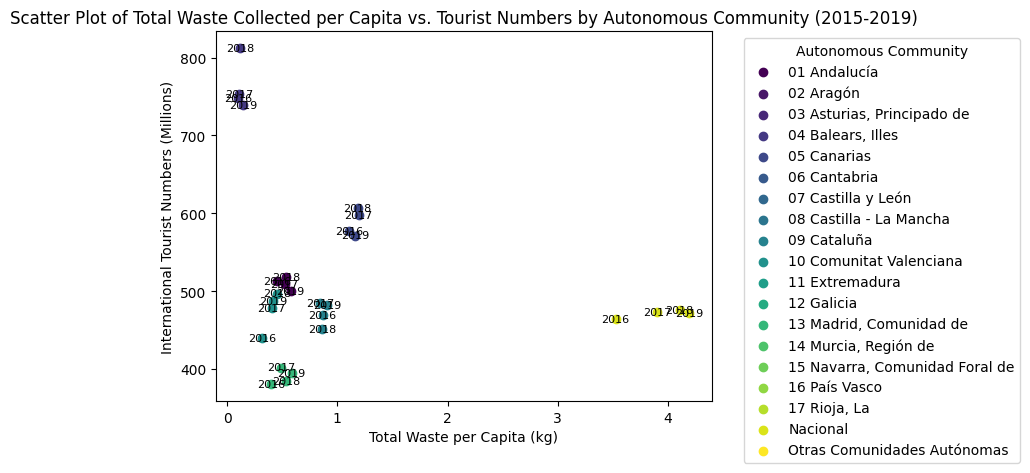

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Autonomous_community' is a column in your DataFrame
unique_communities = df_quarterly_no_covid['Autonomous_community'].unique()
colors = plt.cm.get_cmap('viridis', len(unique_communities))  # Choose a colormap

fig, ax = plt.subplots()  # Create a figure and axes object

for i, community in enumerate(unique_communities):
    community_data = df_quarterly_no_covid[df_quarterly_no_covid['Autonomous_community'] == community]
    ax.scatter(community_data['Monthly_number_of_tourists_millions'], community_data['total_waste_capita'],
               color=colors(i), label=community)

    # Label points with year
    for _, row in community_data.iterrows():
        ax.text(row['Monthly_number_of_tourists_millions'], row['total_waste_capita'], row['Period'].year,
                fontsize=8, ha='center', va='center')

ax.set_xlabel('Total Waste per Capita (kg)')
ax.set_ylabel('International Tourist Numbers (Millions)')
ax.set_title('Scatter Plot of Total Waste Collected per Capita vs. Tourist Numbers by Autonomous Community (2015-2019)')

# Add a legend
ax.legend(title='Autonomous Community', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<ipython-input-11-041172d425ff>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_communities))  # Choose a colormap


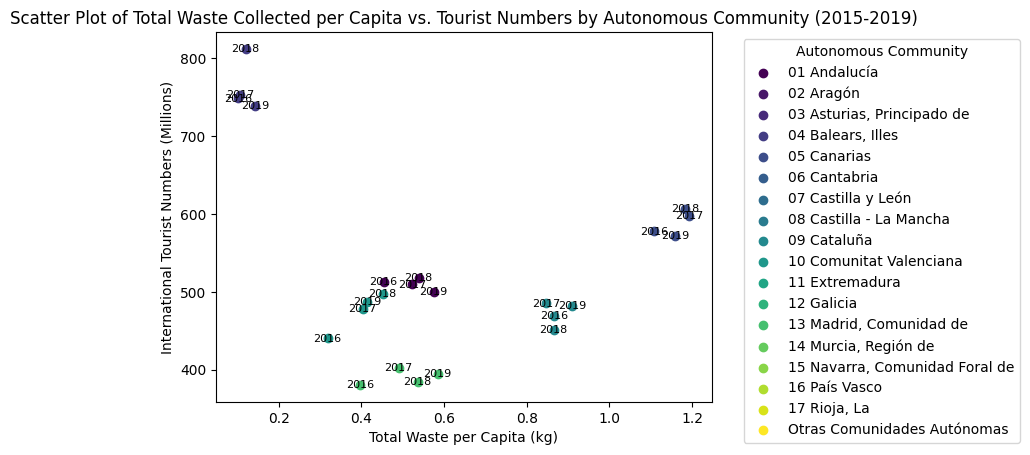

In [ ]:
unique_communities = df_quarterly_no_covid['Autonomous_community'].unique()

# Remove "Nacional" from unique_communities
unique_communities = [community for community in unique_communities if community != 'Nacional']

colors = plt.cm.get_cmap('viridis', len(unique_communities))  # Choose a colormap

fig, ax = plt.subplots()  # Create a figure and axes object

for i, community in enumerate(unique_communities):
    community_data = df_quarterly_no_covid[df_quarterly_no_covid['Autonomous_community'] == community]
    ax.scatter(community_data['Monthly_number_of_tourists_millions'], community_data['total_waste_capita'],
               color=colors(i), label=community)

    # Label points with year
    for _, row in community_data.iterrows():
        ax.text(row['Monthly_number_of_tourists_millions'], row['total_waste_capita'], row['Period'].year,
                fontsize=8, ha='center', va='center')

ax.set_xlabel('Total Waste per Capita (kg)')
ax.set_ylabel('International Tourist Numbers (Millions)')
ax.set_title('Scatter Plot of Total Waste Collected per Capita vs. Tourist Numbers by Autonomous Community (2015-2019)')

# Add a legend
ax.legend(title='Autonomous Community', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
#scatter plot function

from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

def analyze_community_variable(community, variable, df_quarterly_no_covid, colour, title, xlim=None, ylim=None):
  offset = 0.4  # Experiment with different values to adjust the vertical spacing

  # Filter data for autonomous community
  community_data = df_quarterly_no_covid[df_quarterly_no_covid['Autonomous_community'] == community]

  # Create scatter plot
  plt.figure(figsize=(10, 6))  # Adjust figure size if needed
  plt.scatter(community_data['Monthly_number_of_tourists_millions'], community_data['total_waste_capita'], color=f"{colour}")

  # Label points with year and quarter
  for _, row in community_data.iterrows():
    label = row['Period'].strftime('%Y-%d')  # Format without time
    plt.text(row['Monthly_number_of_tourists_millions'], row['total_waste_capita'] + offset, label, fontsize=8, ha='center', va='bottom')


  # Set labels and title
  plt.xlabel('International Tourist Numbers (Millions)')
  plt.ylabel('Waste Collected per Capita (kg)')
  plt.title(f'Scatter Plot of Total Waste Collected per Capita vs. Tourist Numbers for {title} (2015-2019)')

  if xlim:
        plt.xlim(xlim)
  if ylim:
        plt.ylim(ylim)


  plt.show()

  from statsmodels.formula.api import ols
  from statsmodels.iolib.summary2 import summary_col


  model= ols(f'Monthly_number_of_tourists ~ {variable}', data=community_data).fit() # fit the model

  table=summary_col( # create a regression table
      [model], # pass the models to the summary_col function
      stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
      float_format='%0.3f', # set the decimal places to 3
      info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs)), # add the number of observations to the table
      "P-value": lambda x: "{:.3f}".format(x.pvalues[1]),}) # add the number of observations to the table

  print(table)

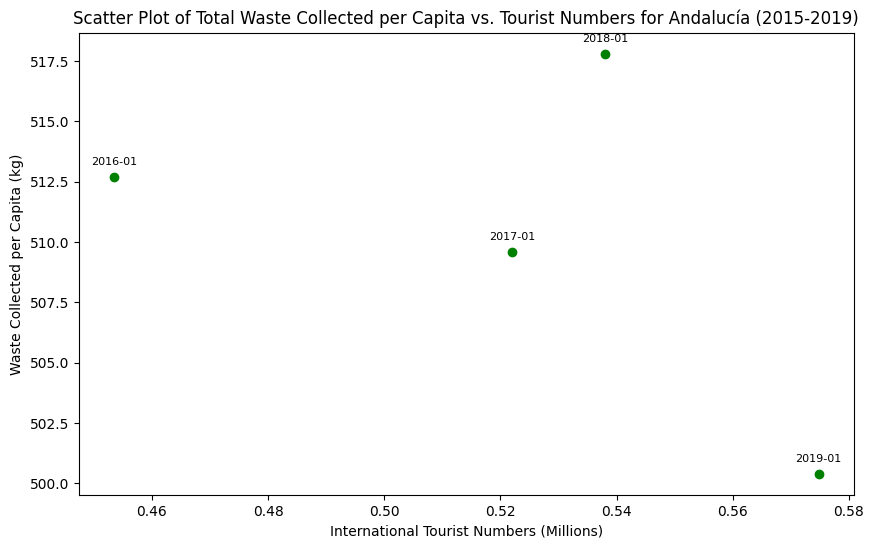


                  Monthly_number_of_tourists
--------------------------------------------
Intercept         1705945.772**             
                  (615803.947)              
Unemployment_rate -28716.787                
                  (24807.063)               
R-squared         0.087                     
R-squared Adj.    0.022                     
N                 16                        
P-value           0.266                     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


<ipython-input-12-5ba2285cfc17>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "P-value": lambda x: "{:.3f}".format(x.pvalues[1]),}) # add the number of observations to the table


In [ ]:
analyze_community_variable('01 Andalucía', 'Unemployment_rate', df_quarterly_no_covid, colour = "green", title = "Andalucía")